# Linaerna regresija

**Linearna regresija** predstavlja problem nalaženja linearne veze između nezavisne promenljive $x$ i zavisne promenljive $y$. Ukoliko je promenljiva $x$ skalar, radi se o prostoj linearnoj regresiji, a ako je promenljiva $x$ vektor, reč je o linearnoj regresiji za funkciju više promenljivih. U oba slučaja, pretpostavka je da je zavisna promenljiva $y$ skalar.

**Prosta linearna regresija** predstavlja nalaženje linearne veze između parova skalara $(x_i, y_i)$, $1 \le i \le n$. Veza je data linearnom funkcijom $f(x) = \beta_0 + \beta_1 x$ po parametrima $\beta_0$ i $\beta_1$ gde su $\beta_0$ i $\beta_1$ parametri koje treba odrediti. Ako je $X=[x_1, \dots, x_n]$ i $Y=[y_1, \dots, y_n]$, izraz se može zapisati u matričnom obliku kao $\begin{bmatrix}1&X\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\\beta_1\end{bmatrix} = Y$, gde je $\begin{bmatrix}1&X\end{bmatrix}$ matrica čija se prva kolona sastoji samo od jedinica, a druga kolona je vektor $X$.

**Linearna regresija za funkciju više promenljivih** predstavlja nalaženje linearne veze između parova vektora i skalara $(X_i, y_i)$, $1 \le i \le n$. Veza je data linearnom funkcijom $f(x_1,\dots,x_m) = \beta_0 + \beta_1 x_1 + \dots + \beta_m x_m$ po parametrima $\beta_0, \dots, \beta_m$ gde su $\beta_0, \dots, \beta_m$ parametri koje treba odrediti. Izraz se može zapisati u matričnom obliku kao $\begin{bmatrix}1&X_1&\cdots&X_m\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\ \vdots \\ \beta_m\end{bmatrix} = Y$, gde je $Y=[y_1, \dots, y_n]$, $\begin{bmatrix}1&X_1&\cdots&X_m\end{bmatrix}$ matrica čija se prva kolona sastoji samo od jedinica, a ostale kolone su redom vektori $X_1,\dots,X_m$. 

Sistem jednačina $\begin{bmatrix}1&X\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\\beta_1\end{bmatrix} = Y$ kod proste linearne regresije, odnosno $\begin{bmatrix}1&X_1&\cdots&X_m\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\ \vdots \\ \beta_m\end{bmatrix} = Y$ kod linearne regresije za funkciju više promenljivih, se najčešće rešava **metodom najmanjih kvadrata**. Takav sistem u praksi obično ima više jednačina nego promenljivih i najčešće nema egzaktno rešenje.

Ako sistem napišemo u obliku $A\beta = Y$, njegovo rešavanje predstavlja nalaženje onog vektora $\beta$ za koji je vrednost izraza $||Y - \beta A||_2^2$ najmanja. Ovde je sa $||a||_2 = \sqrt{a_1^2 + a_2^2 + \dots + a_n^2}$ označena 2-norma vektora $a = (a_1, a_2, \dots, a_n)$. Rešenje je dato u obliku $\beta=(A^{T}A)^{-1}A^{T}Y$, gde se matrica $(A^{T}A)^{-1}A^{T}$ se naziva pseudoinverz matrice $A$.

U slučaju proste linearne regresije, može se pokazati da je $$\beta_1 = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}$$ i $\beta_0 = \bar{y} - \beta_1 \bar{x}$, gde je $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$ aritmetička sredina nezavisnih, a $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$ zavisnih promenljivih.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Za rešavanje zadataka linerne regresije - funkcije koji su korisceni i do sada:

Neka je potrebno naći linearnu vezu između parova nezavisnih i zavisnih promenljivih: $(0, 1.2)$, $(0.5, 2.05)$, $(1, 2.9)$ i $(-0.5,0.1)$:

In [3]:
X = np.array([[0], [0.5], [1], [-0.5]])
y = np.array([1.2, 2.05, 2.9, 0.1])
reg = linear_model.LinearRegression()
reg.fit(X, y)

print(reg.coef_)
print(reg.intercept_)
print(reg.predict(X))

[1.85]
1.1
[1.1   2.025 2.95  0.175]


**Scikit-learn** je Python biblioteka namenjena mašinskom učenje. U njoj su implementirani mnogobrojni algoritmi klasifikacije, regresije i grupisanja. Na ovoj [adresi](https://scikit-learn.org/stable/) možete istražiti sve funkcionalnosti biblioteke, a mi ćemo se u daljem radu usredsrediti na linearne modele dostupne kroz `linear_model` paket. 

In [2]:
from sklearn import linear_model

Najpre se kreira objekat klase `LinearRegression`. Prikazani argumenti funkcije `fit` su matrica $X$ sa kolonama koje predstavljaju vektore nezavisnih promenljivih i vektor $y$ čije koordinate predstavljaju zavisne promenljive. Nakon poziva funkcije, niz `coef_` predstavlja koeficijente, a `intercept_` slobodni član linearne regresije. Funkcijom `predict` se mogu predvideti vrednosti linearne regresije za odgovarajuće unose. U primeru se može videti razlika između predviđenih vrednosti `reg.predict(X)` i stvarnih vrednosti `y`.

**Ocena greške** linearne regresije se može odrediti na više načina:

* Mean absolute error (MAE) je prosečna apsolutna razlika između stvarne i predviđene vrednosti, $\text{MAE} = \frac{1}{n}\sum_{i=1}^n{|\hat{y_i}-y_i|}$.

* Mean squared error (MSE) je jednaka prosečnom kvadratu razlike između stvarne i predviđene vrednosti, $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}{(\hat{y_i} - y_i)^2}$. Naziva se još i residual square sum (RSS).

* $R^2$ je jednaka $R^2= 1 - \frac{RSS}{TSS}$, gde je $TSS = \sum_{i=1}^{n} {(y_i-\overline{y})^2}$ ukupna suma kvadrata razlike između stvarne i predviđene vrednosti (total sum of squares). Što je vrednost bliža jedinici, greška je manja.

U nastavku će kroz primer reklamiranja na TV-u, radiju i novinama, biti prikazano na koji način se linearna regresija može iskoristiti za kreiranje modela koji predviđa količinu prodaje. Biće prikazane i neke dosetke za rad sa modelima mašinskog učenja (kroz primer linearne regresije). 

**Zadatak.** Svaki red u ulaznom CSV fajlu sadrži informacije o cenama u hiljadama dolara reklamnih usluga na određenom tržištu. Prva kolona se odnosi na cene reklamiranja na televiziji, druga na radiju, a treća u novinama. Četvrta kolona se odnosi na ukupnu prodaju proizvoda koji su se reklamirali na datim medijima. Kreirati linearni model koji predviđa prodaju na osnovu cena reklamiranja.

**Rešenje.** Osnovne informacije o podacima iz CSV fajla:

In [4]:
data = pd.read_csv('advertising.csv', index_col=0)
print('Broj unosa:', data.shape[0])
data.head()

Broj unosa: 200


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Prikazano je prvih 5 od ukupno 200 unosa. Sa `index_col=0` je naznačeno da se prva kolona odnosi na indeksiranje.

Izvucimo potrebne podatke i proverimo da li postoji linearna zavisnost između svakog načina reklamiranja ponaosob i prodaje:

In [5]:
tv = data['TV']
radio = data['Radio']
newspaper = data['Newspaper']
sales = data['Sales']

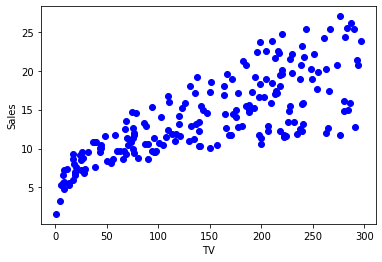

In [6]:

plt.xlabel("TV")
plt.ylabel("Sales")
plt.scatter(tv, sales, color='blue')
plt.show()

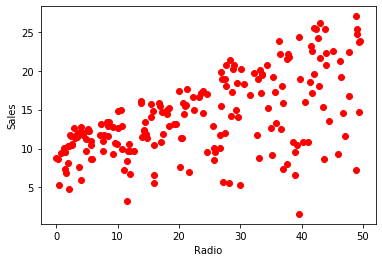

In [7]:
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.scatter(radio, sales, color='red')
plt.show()

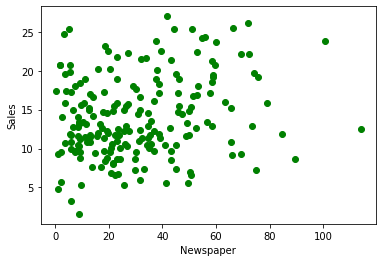

In [8]:
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.scatter(newspaper, sales, color='green')
plt.show()

Zaključujemo da je linearna zavisnost prodaje od reklamiranja na TV-u najveća, a najmanja od reklamiranja u novinama. 

In [9]:
reg = linear_model.LinearRegression()
tv_radio_newspaper = data[['TV', 'Radio', 'Newspaper']]
reg.fit(tv_radio_newspaper, sales)
print(reg.coef_)
print(reg.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.9388893694594067


Dakle, formula linearne zavisnosti je $\text{Sales} = 0.04576465 \cdot \text{TV} + 0.18853002 \cdot \text{Radio} - 0.00103749 \cdot \text{Newspaper} + 2.9388893694594085.$

Ocena greške:

In [10]:
from sklearn import metrics

In [11]:
predicted = reg.predict(tv_radio_newspaper)
mae = metrics.mean_absolute_error(sales, predicted)
mse = metrics.mean_squared_error(sales, predicted)
r2 = reg.score(tv_radio_newspaper, sales)

print('MAE =', mae)
print('MSE =', mse)
print('R^2 =', r2)

MAE = 1.2520112296870682
MSE = 2.784126314510936
R^2 = 0.8972106381789521


Kod ovakvog modeliranja, može se dogoditi da se problem previše prilagodi skupu podataka nad kojim je istreniran, pa da se lošije ponaša na nekom skupu podataka koji prethodno nije bio testiran (overfitting). Zbog toga je poželjno podeliti skup podataka na skup za treniranje i skup za testiranje. 

In [12]:
from sklearn import model_selection

# train_size predstavlja deo podataka za treniranje
# test_size predstavlja deo podataka za testiranje
# random_state se odnosi na seed
xtrain, xtest, ytrain, ytest \
= model_selection.train_test_split(tv_radio_newspaper, sales, test_size=0.33, random_state=1)
reg_train_test = linear_model.LinearRegression()
reg_train_test.fit(xtrain, ytrain)
print(reg_train_test.coef_)
print(reg_train_test.intercept_)
print('R^2:', reg_train_test.score(xtest, ytest))

[0.04574124 0.180924   0.0031418 ]
3.019195161687442
R^2: 0.9142453857006444


Formula modela sada postaje $\text{Sales} = 0.04574124 \cdot \text{TV} + 0.180924 \cdot \text{Radio} + 0.0031418 \cdot \text{Newspaper} + 3.0191951616874455.$

Različitim podelama polaznog skupa na skup za treniranje i skup za tesiranje se dobijaju modeli u kojima figurišu drugi parametri. Potreban nam je mehanizam kojim (u opštem slučaju) možemo da upoređujemo modele sa ciljem odabira najboljeg modela. Tome nam služi **unakrsna validacija** (cross validation).

Kod unakrsne validacije se polazni skup particioniše na $k$ delova (gde je $k$ unapred izabrani parametar). Model se trenira na svih $k-1$ podskupova odjednom, a testira na preostalom podskupu. Proces se ponavlja $k$ puta, pri čemu se u svakoj iteraciji koristi drugačiji skup za testiranje.

In [13]:
reg_cross = linear_model.LinearRegression()
scores = model_selection.cross_val_score(reg_cross, tv_radio_newspaper, sales, cv = 10)
print('Svi skorovi:', scores)
print('Srednji skor:', scores.mean())

Svi skorovi: [0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]
Srednji skor: 0.8853562237979616


Postavlja se pitanje da li se, eventualno, izuzimanjem neke od veličina (TV, radio ili newspaper) dobija bolji model:

In [14]:
reg_tv_radio = linear_model.LinearRegression()
tv_radio = data[['TV', 'Radio']]
scores = model_selection.cross_val_score(reg_tv_radio, tv_radio, sales, cv = 10)
scores.mean()

0.8869670516810129

In [15]:
reg_tv_newspaper = linear_model.LinearRegression()
tv_newspaper = data[['TV', 'Newspaper']]
scores = model_selection.cross_val_score(reg_tv_newspaper, tv_newspaper, sales, cv = 10)
scores.mean()

0.6066319724531258

In [16]:
reg_radio_newspaper = linear_model.LinearRegression()
radio_newspaper = data[['Radio', 'Newspaper']]
scores = model_selection.cross_val_score(reg_radio_newspaper, radio_newspaper, sales, cv = 10)
scores.mean()

0.2896575080826854

Rezultati ukazuju na najbolje ponašanje modela koji sadrži samo veličine TV i Radio.